# Лабораторная работ № 1
Цель: реализовать классификацию сортов растения ирис (Iris Setosa - 0, Iris Versicolour - 1, Iris Virginica - 2) по четырем признакам: размерам пестиков и тычинок его цветков.
Задачи:
- Ознакомиться с задачей классификации
- Загрузить данные
- Создать модель ИНС
- Настроить параметры обучения
- Обучить и оценить модель
Многоклассовая классификация цветов

Выполнил:
    Студент группы БФИ1901
    Чернышов Дмитрий Викторович

In [1]:
#Подключение модулей
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#Загрузка данных
dataframe = pandas.read_csv("iris.csv", header=None) #считываем таблицу из exel в dataframe
dataset = dataframe.values #преобразование в список
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
#Переход от текстовых меток к категориальному вектору
encoder = LabelEncoder() #Инициализируем кодировщик данных
encoder.fit(Y) #Устанавливаем кодировщик
encoded_Y = encoder.transform(Y) #преоразуем в числовой формат
dummy_y = to_categorical(encoded_Y) #преообразование  матрицу
#Теперь можно задать базовую архитектуру сети
model = Sequential() #Инициализируем модель данных
model.add(Dense(4, activation='relu')) #Слой relu -  избавляемся от отрицательных чисел
model.add(Dense(3, activation='softmax')) #Слой softmax -  преобразовываем в вероятность [0,1]
#Инициализация параметров обучения
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) #указываем параметры обучения
#(optimizer - тип процедуры обучения, loss -функция потерь, metrics - имя или обьект из модуля metrics)
#Обучение сети
f = model.fit(X, dummy_y, epochs=75, batch_size=10,validation_split=0.1)#запускает обучение по модели 
#(epochs - кол-во итераций, batch_size - кол-во выборов для одного обучения 
#validation_split - часть данных об обучении которые будут использоваться в качестве данных для проверки)

Epoch 1/75
14/14 [==============================] - 0s 11ms/step - loss: 1.4058 - accuracy: 0.3704 - val_loss: 2.0040 - val_accuracy: 0.0000e+00
Epoch 2/75
14/14 [==============================] - 0s 4ms/step - loss: 1.3087 - accuracy: 0.3704 - val_loss: 1.8371 - val_accuracy: 0.0000e+00
Epoch 3/75
14/14 [==============================] - 0s 3ms/step - loss: 1.2242 - accuracy: 0.3704 - val_loss: 1.7211 - val_accuracy: 0.0000e+00
Epoch 4/75
14/14 [==============================] - 0s 3ms/step - loss: 1.1722 - accuracy: 0.3704 - val_loss: 1.6221 - val_accuracy: 0.0000e+00
Epoch 5/75
14/14 [==============================] - 0s 3ms/step - loss: 1.1441 - accuracy: 0.3704 - val_loss: 1.5359 - val_accuracy: 0.0000e+00
Epoch 6/75
14/14 [==============================] - 0s 3ms/step - loss: 1.1268 - accuracy: 0.3704 - val_loss: 1.4595 - val_accuracy: 0.0000e+00
Epoch 7/75
14/14 [==============================] - 0s 3ms/step - loss: 1.1117 - accuracy: 0.3778 - val_loss: 1.3951 - val_accuracy: 0.

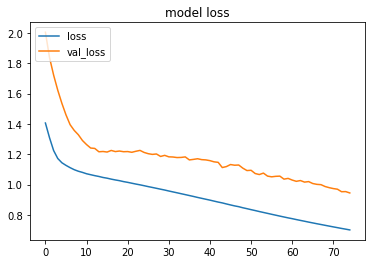

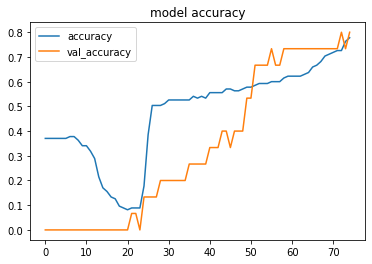

In [2]:
plt.plot(f.history['loss'])
plt.plot(f.history['val_loss'])
plt.title('model loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(f.history['accuracy'])
plt.plot(f.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

Вопрос №1 Изучить различные архитектуры ИНС (Разное кол-во слоев, разное кол-во нейронов на слоях)

In [3]:
models = Sequential() #Инициализируем модель данных
models.add(Dense(4, activation='relu')) #Слой relu -  избавляемся от отрицательных чисел
models.add(Dense(3, activation='sigmoid')) #Слой softmax -  преобразовываем в вероятность [0,1]
models.add(Dense(3, activation='softmax')) #Слой tanh -  преобразовываем в гиперболический тангенс
models.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
f1 = models.fit(X, dummy_y, epochs=75, batch_size=10,validation_split=0.1)

Epoch 1/75
14/14 [==============================] - 0s 10ms/step - loss: 1.4602 - accuracy: 0.2593 - val_loss: 0.4269 - val_accuracy: 1.0000
Epoch 2/75
14/14 [==============================] - 0s 3ms/step - loss: 1.4313 - accuracy: 0.2593 - val_loss: 0.4540 - val_accuracy: 1.0000
Epoch 3/75
14/14 [==============================] - 0s 4ms/step - loss: 1.3985 - accuracy: 0.2593 - val_loss: 0.4877 - val_accuracy: 1.0000
Epoch 4/75
14/14 [==============================] - 0s 3ms/step - loss: 1.3579 - accuracy: 0.2593 - val_loss: 0.5362 - val_accuracy: 1.0000
Epoch 5/75
14/14 [==============================] - 0s 2ms/step - loss: 1.3063 - accuracy: 0.2593 - val_loss: 0.6070 - val_accuracy: 1.0000
Epoch 6/75
14/14 [==============================] - 0s 5ms/step - loss: 1.2451 - accuracy: 0.2593 - val_loss: 0.7008 - val_accuracy: 1.0000
Epoch 7/75
14/14 [==============================] - 0s 3ms/step - loss: 1.1771 - accuracy: 0.2593 - val_loss: 0.7990 - val_accuracy: 1.0000
Epoch 8/75
14/14 [=

Epoch 59/75
14/14 [==============================] - 0s 2ms/step - loss: 0.7313 - accuracy: 0.7407 - val_loss: 0.8701 - val_accuracy: 0.0000e+00
Epoch 60/75
14/14 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.7407 - val_loss: 0.8791 - val_accuracy: 0.0000e+00
Epoch 61/75
14/14 [==============================] - 0s 3ms/step - loss: 0.7174 - accuracy: 0.7407 - val_loss: 0.8756 - val_accuracy: 0.0000e+00
Epoch 62/75
14/14 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.7407 - val_loss: 0.8744 - val_accuracy: 0.0000e+00
Epoch 63/75
14/14 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.7407 - val_loss: 0.8669 - val_accuracy: 0.0000e+00
Epoch 64/75
14/14 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.7407 - val_loss: 0.8706 - val_accuracy: 0.0000e+00
Epoch 65/75
14/14 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.7407 - val_loss: 0.8680 - val_accura

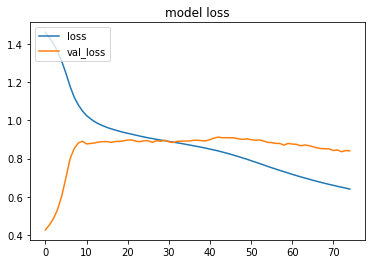

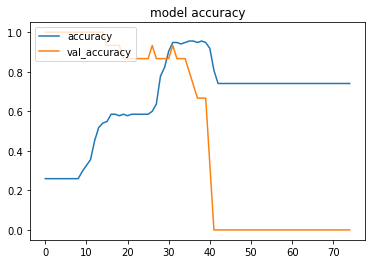

In [4]:
plt.plot(f1.history['loss'])
plt.plot(f1.history['val_loss'])
plt.title('model loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(f1.history['accuracy'])
plt.plot(f1.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

Вопрос №2 Изучить обучение при различных параметрах обучения (параметры функции fit)

In [37]:
f2 = model.fit(X, dummy_y, epochs=100, batch_size=33, validation_split=0.1)#запускает обучение по модели 
#(epochs - кол-во итераций, batch_size - кол-во выборов для одного обучения
#validation_split - часть данных об обучении которые будут использоваться в качестве данных для проверки)

Epoch 1/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0771 - accuracy: 0.9852 - val_loss: 0.1090 - val_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0769 - accuracy: 0.9852 - val_loss: 0.1105 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0768 - accuracy: 0.9852 - val_loss: 0.1100 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0767 - accuracy: 0.9852 - val_loss: 0.1104 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0767 - accuracy: 0.9852 - val_loss: 0.1094 - val_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0767 - accuracy: 0.9852 - val_loss: 0.1093 - val_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0768 - accuracy: 0.9852 - val_loss: 0.1088 - val_accuracy: 1.0000
Epoch 8/100
5/5 [===

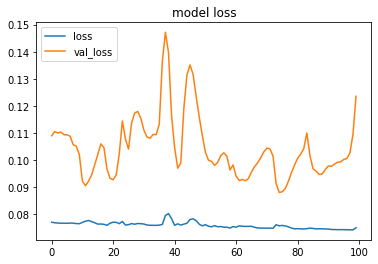

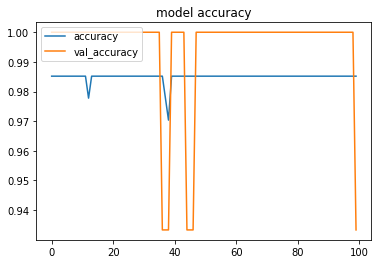

In [38]:
plt.plot(f2.history['loss'])
plt.plot(f2.history['val_loss'])
plt.title('model loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(f2.history['accuracy'])
plt.plot(f2.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

Вопрос № 4 Выбрать наиулучшую модель
f1 = models.fit(X, dummy_y, epochs=75, batch_size=10,validation_split=0.1)